# Neighborhood Component Analysis: Enhancing Class Separability in Dimensionality Reduction

## Author: UBANDIYA Najib Yusuf, MLE

In this notebook, we will perform Exploratory Data Analysis (EDA) on the Iris dataset to understand its characteristics and feature distributions. This will help in assessing the effectiveness of Neighborhood Component Analysis (NCA) as a dimensionality reduction technique in enhancing class separability. 

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NeighborhoodComponentsAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [17]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical species to categorical names for better readability
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 1000x800 with 0 Axes>

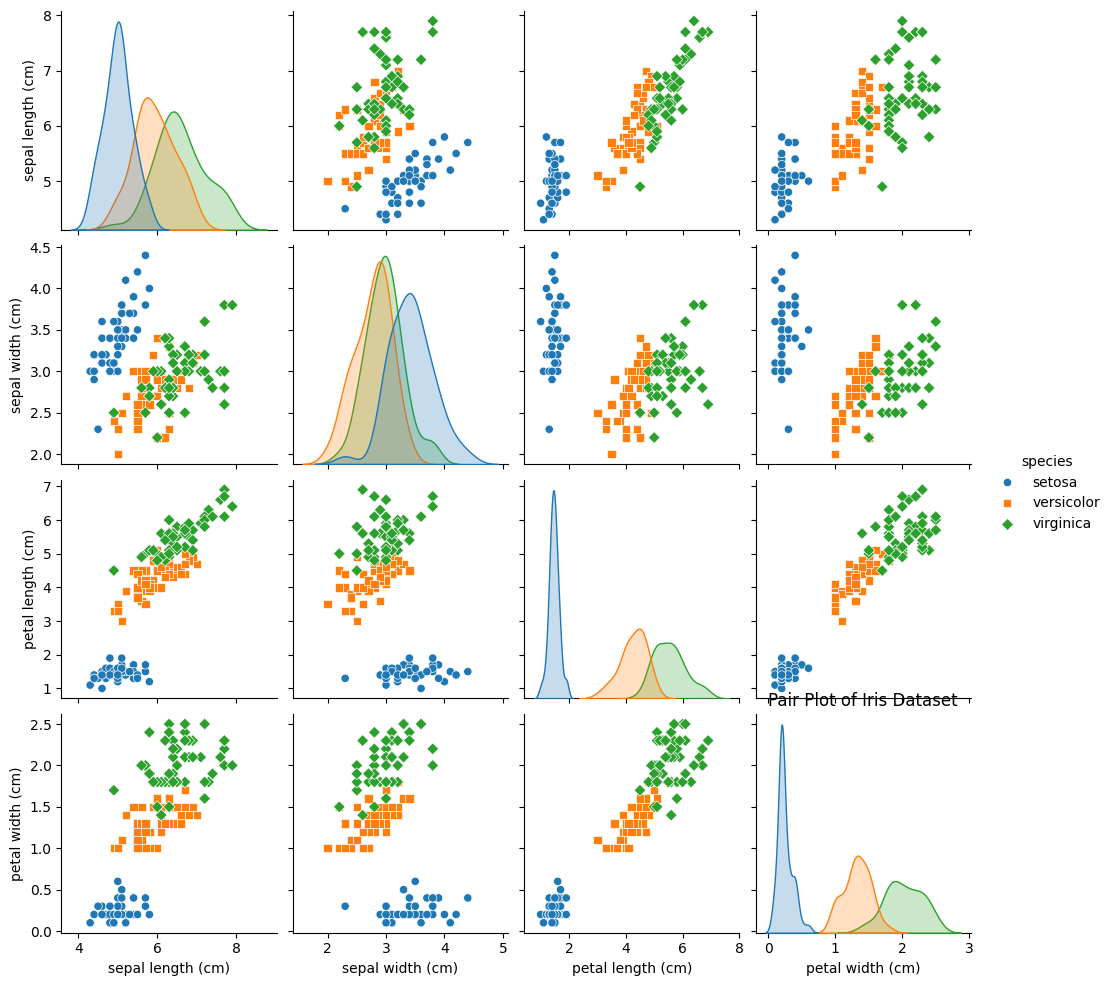

In [18]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.title('Pair Plot of Iris Dataset')
plt.show()

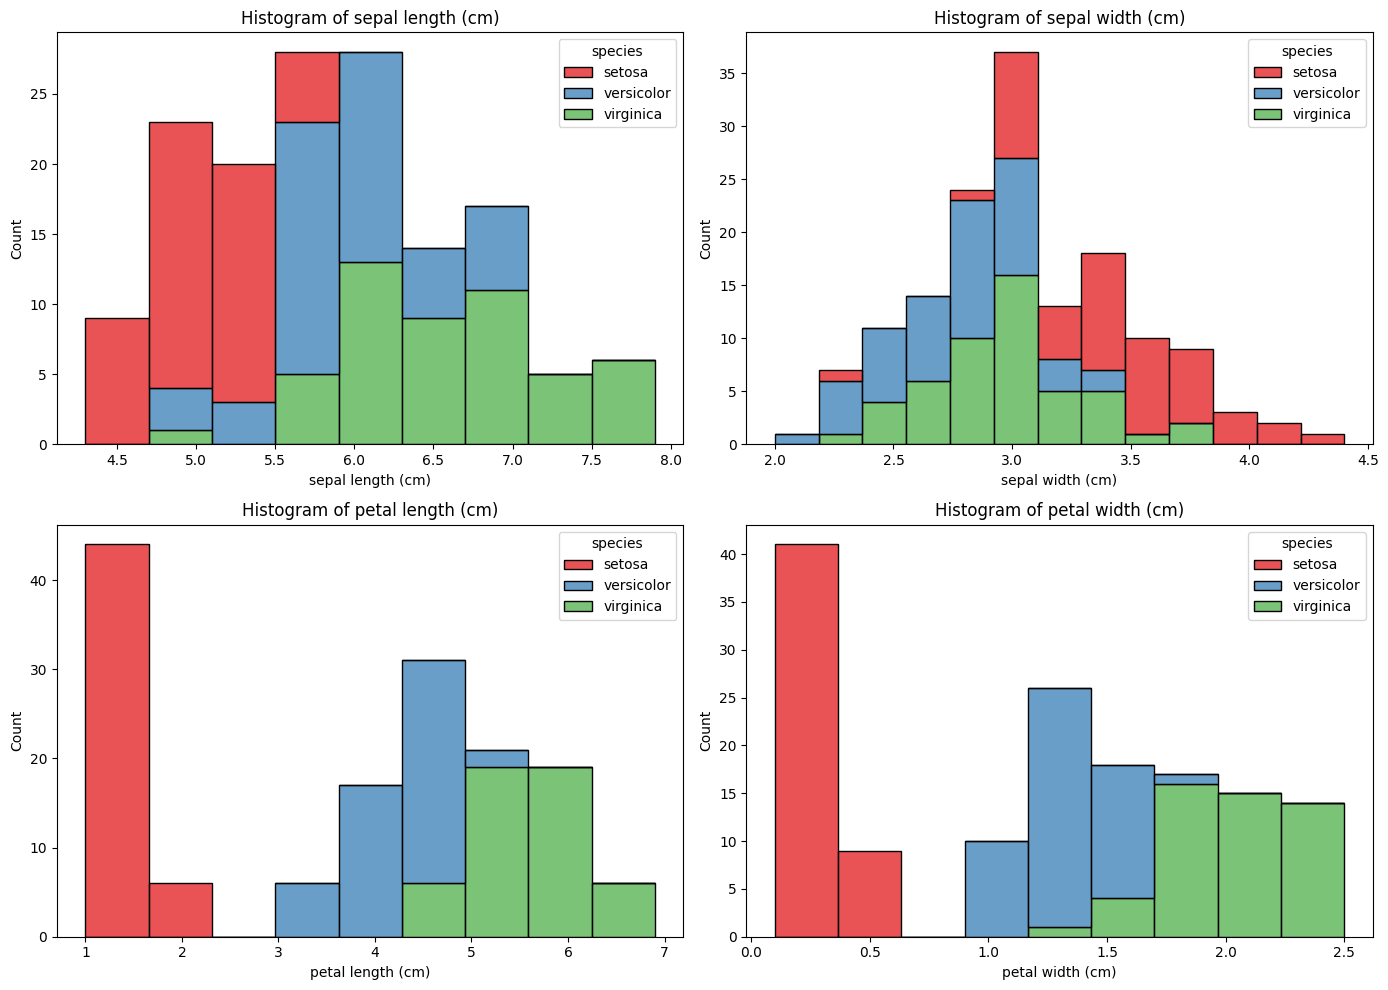

In [19]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=column, hue='species', multiple='stack', palette='Set1')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


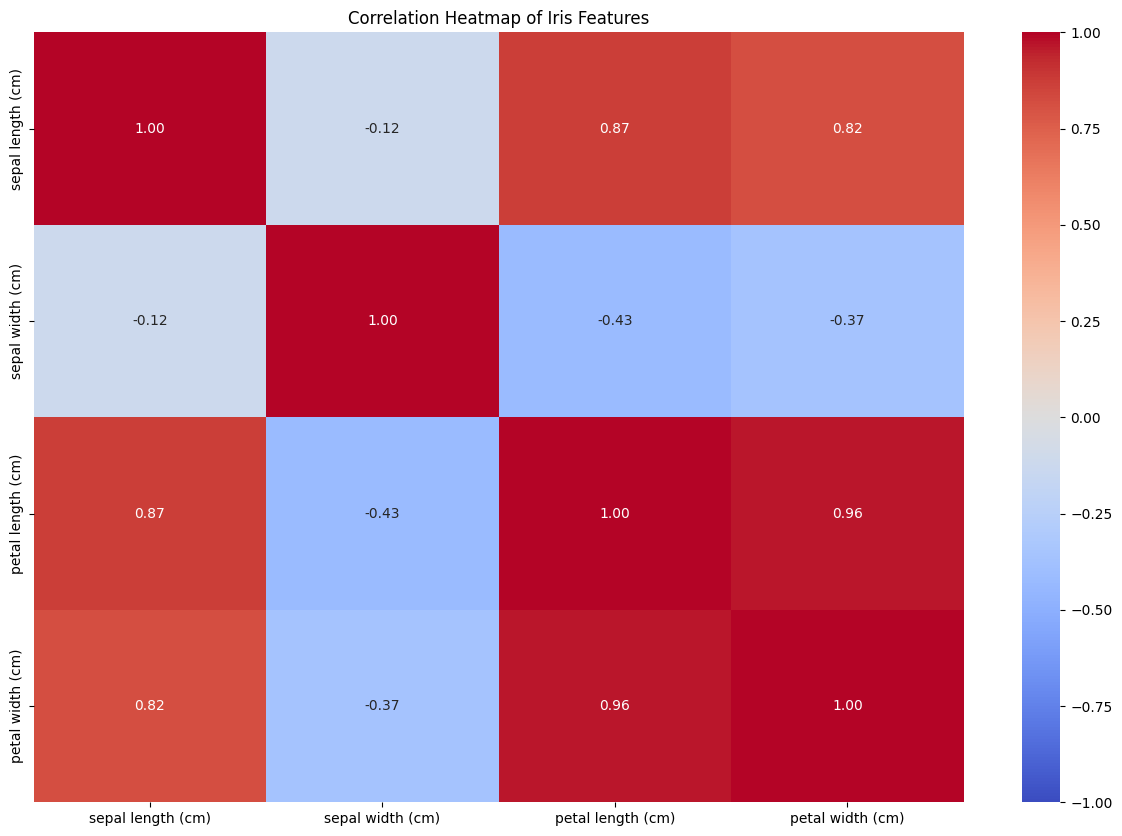

In [20]:
plt.figure(figsize=(15, 10))
correlation_matrix = iris_df.drop(columns='species').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Features')
plt.show()


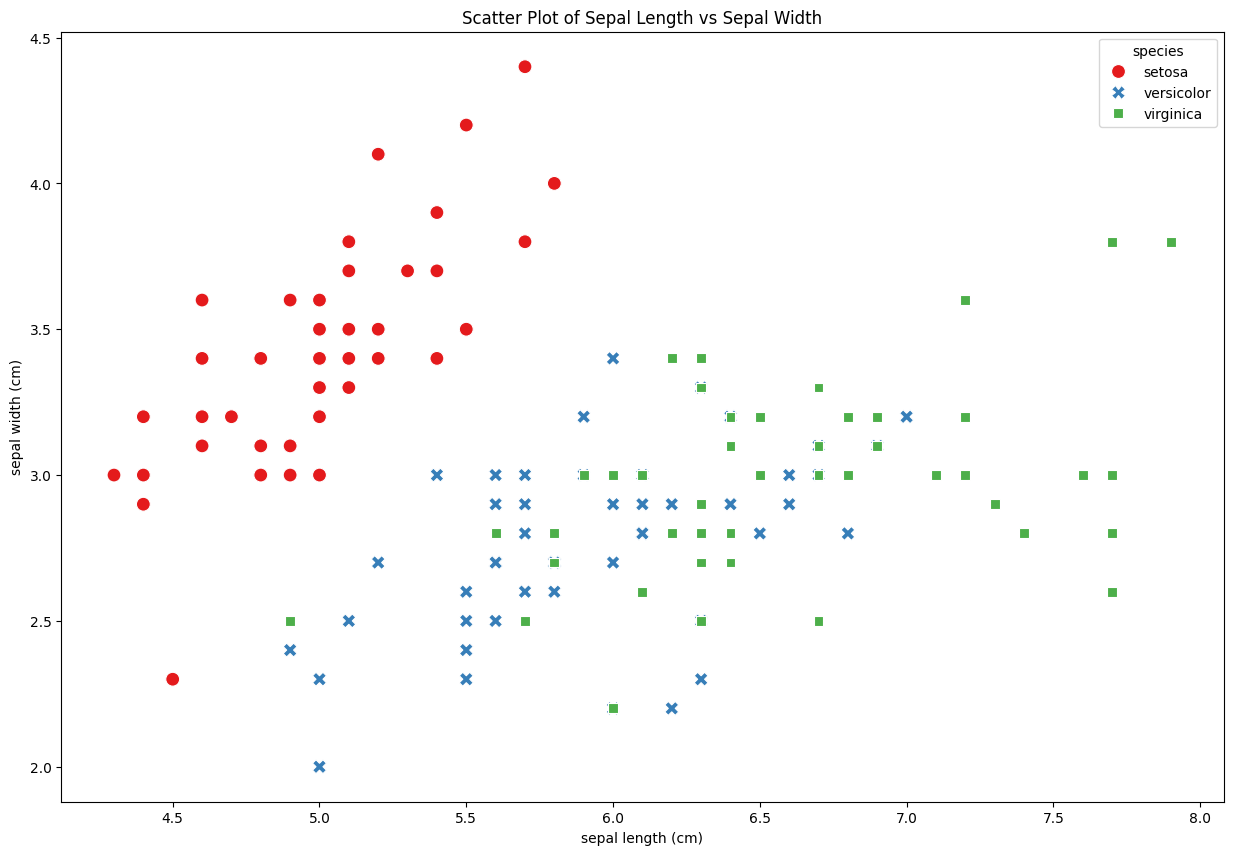

In [21]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species', palette='Set1', s=100)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()


## Summary of Findings

In this EDA, we observed:
- **Pair Plot**: Distinct separation of classes is visible for some features, but there is some overlap, particularly between `versicolor` and `virginica`.
- **Histograms**: The distribution of features shows some classes are well-separated, while others overlap.
- **Correlation Heatmap**: Some features are highly correlated, which might influence the effectiveness of dimensionality reduction.
- **Scatter Plots**: Visualisation of feature interactions reveals areas of overlap between species, indicating potential challenges for NCA.

These insights will help us in understanding the impact of NCA on class separability and feature reduction.

## Neighborhood Component Analysis (NCA)

Neighborhood Component Analysis (NCA) is a supervised dimensionality reduction technique designed to enhance classification performance. Unlike unsupervised methods such as Principal Component Analysis (PCA), NCA incorporates class label information to learn a linear transformation of the feature space that improves class separability. This makes NCA particularly effective for classification tasks where maintaining class distinction is crucial.

In this section, we will implement NCA on the Iris dataset and compare its performance to PCA.


## Load the Iris dataset

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

## Standardize the data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Function to plot 2D projections

In [23]:
def plot_2d_projection(X_proj, y, title):
    plt.figure(figsize=(15, 10))
    colors = ['r', 'g', 'b']

    for i, color in zip(range(len(iris.target_names)), colors):
        idx = np.where(y == i)[0]
        sns.scatterplot(x=X_proj[idx, 0], y=X_proj[idx, 1], color=color,
                        label=iris.target_names[i], edgecolor='k', s=50)

    plt.title(title)
    plt.legend()
    plt.show()


## Apply PCA and reduce dimensionality to 2

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Apply NCA and reduce dimensionality to 2

In [8]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca.fit(X_train, y_train)
X_train_nca = nca.transform(X_train)
X_test_nca = nca.transform(X_test)


## Initialize k-NN classifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

## Train and test on PCA-transformed data

In [10]:
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)

## Train and test on NCA-transformed data

In [11]:
knn.fit(X_train_nca, y_train)
y_pred_nca = knn.predict(X_test_nca)
nca_accuracy = accuracy_score(y_test, y_pred_nca)

## Print accuracy results

In [12]:
print(f"Accuracy with PCA: {pca_accuracy * 100:.2f}%")
print(f"Accuracy with NCA: {nca_accuracy * 100:.2f}%")
print()

print(f'PCA confusion matrix:\n{confusion_matrix(y_test, y_pred_pca)}')
print()
print(f'NCA confusion matrix:\n {confusion_matrix(y_test, y_pred_nca)}')
print()

print(f'PCA classification report:\n {classification_report(y_test, y_pred_pca)}')
print()
print(f'NCA classification report:\n {classification_report(y_test, y_pred_nca)}')

Accuracy with PCA: 95.56%
Accuracy with NCA: 97.78%

PCA confusion matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]

NCA confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

PCA classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


NCA classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Plot the projections

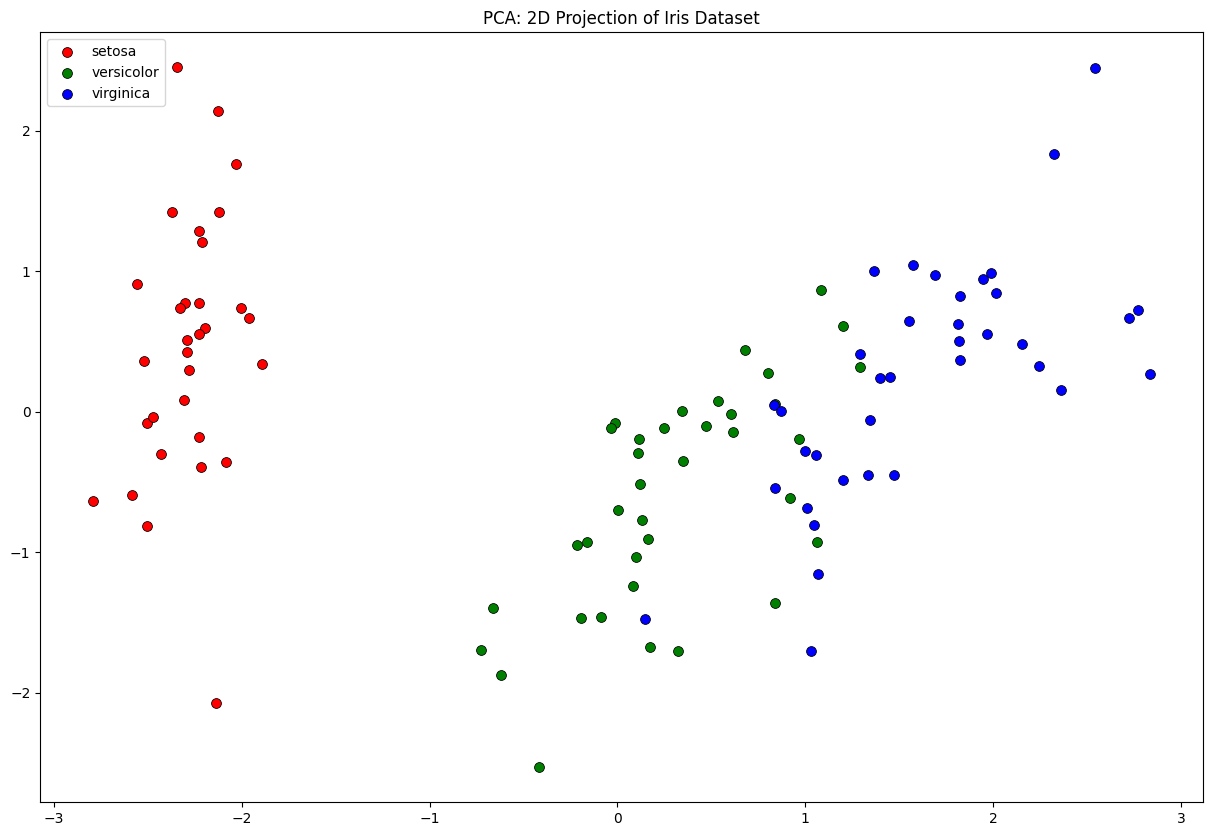

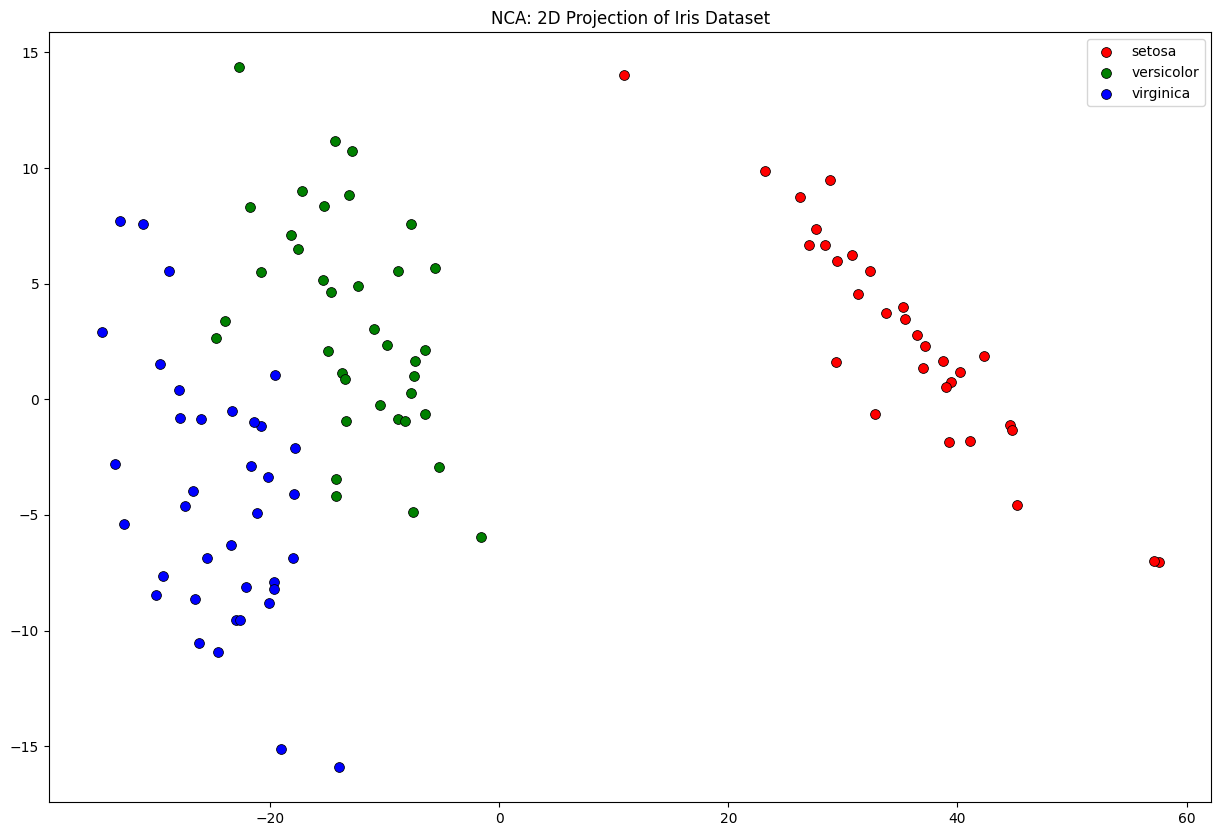

In [24]:
plot_2d_projection(X_train_pca, y_train, 'PCA: 2D Projection of Iris Dataset')
plot_2d_projection(X_train_nca, y_train, 'NCA: 2D Projection of Iris Dataset')

## Results and Comparison

After applying Neighborhood Component Analysis (NCA) and Principal Component Analysis (PCA) on the Iris dataset, we evaluated their performance using a k-Nearest Neighbors (k-NN) classifier.

- **PCA Accuracy**: The accuracy achieved using PCA for dimensionality reduction is 95.56%.
- **NCA Accuracy**: The accuracy achieved using NCA for dimensionality reduction is 97.78%.

### PCA vs. NCA

- **Classification Accuracy**: NCA generally provides higher classification accuracy compared to PCA, as it directly optimises for class separability.
- **Confusion Matrix**: NCA shows improved performance in distinguishing between classes, particularly where PCA struggles with overlaps.

These results underscore the effectiveness of NCA in enhancing class separability, making it a valuable technique for supervised dimensionality reduction.


## Conclusion

In this study, we compared Neighborhood Component Analysis (NCA) with Principal Component Analysis (PCA) for dimensionality reduction on the Iris dataset. 

- **NCA** demonstrated superior classification accuracy and better class separability compared to PCA, highlighting its effectiveness in supervised learning scenarios where class labels are available.
- **PCA**, while useful for reducing dimensionality, did not perform as well in distinguishing between closely related classes in this context.

These findings support the use of NCA when the goal is to enhance class separability for classification tasks.


## Future Work

Future studies could investigate the following:
- **Scalability**: Assess the performance of NCA on larger and more complex datasets.
- **Non-Linear Variants**: Explore kernel-based methods or non-linear variants of NCA for improved performance on datasets with complex structures.
- **Hyperparameter Tuning**: Fine-tune the hyperparameters of NCA and compare with other supervised dimensionality reduction techniques.

Such investigations could provide deeper insights into the effectiveness and applicability of NCA in various machine learning scenarios.
